<a href="https://colab.research.google.com/github/Sauravp123/The-Sparks-Foundation-Tasks/blob/master/Task_2_To_Explore_Supervised_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Sparks Foundation Task-2

 # TASK: 2 - To Explore Supervised Machine Learning

### There are two types of supervised machine learning algorithms: Regression and classification. In this task we have applied linear regression on data to predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [ ]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
# Reading the data from given link
url= "http://bit.ly/w-data"
data=pd.read_csv(url)
print("Data Imported Successfully")
data.head(10)

Data Imported Successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
# Let's Explore the data
data.shape

(25, 2)

In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [ ]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Let's plot our data points on 2-D Graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with following script:-

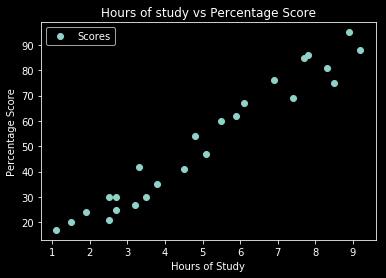

In [ ]:
#Plotting the distribution of Scores
from matplotlib import style
data.plot(x='Hours', y='Scores', style='o') 
style.use('dark_background')
plt.title('Hours of study vs Percentage Score')  
plt.xlabel('Hours of Study')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph we can find the linear relation between the number of hours studied by the student and the percentage of score.

## Preparing the data

In [ ]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [ ]:
from sklearn.model_selection import train_test_split

# split into train and test set
x_train,x_test,y_train,y_test=train_test_split(x,
                                              y,
                                              test_size=0.2,
                                              random_state=0)

## Training the algorithm


After splitting up ofdata into training and test set we are going to train it.

In [ ]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(x_train, y_train) 

print("Training is done.")

Training is done.


In [ ]:
prediction=lr.predict(x_test)

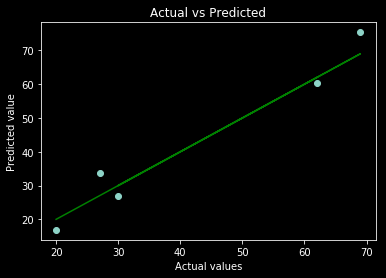

In [ ]:
plt.scatter(y_test,prediction)
plt.plot(y_test,y_test,color="green")
plt.xlabel('Actual values')
plt.ylabel('Predicted value')
plt.title("Actual vs Predicted")
plt.show()

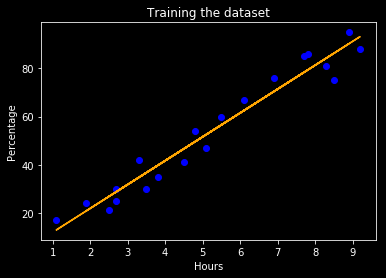

In [ ]:
plt.scatter(x_train,y_train,color="blue")
plt.plot(x_train,lr.predict(x_train),color="orange")
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.title("Training the dataset")
plt.show()

## Making predictions

Now that we have trained our algorithm, it's time to make some predictions.

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
print(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## What will be predicted score if a student study for 9.25 hrs in a day?

## Prediction Of 9.25 Hrs

In [ ]:
# You can also test with your own data
#hours = 9.25
lr.predict([[9.25]])

array([93.69173249])

## Evaluating the model

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:',metrics.mean_absolute_error(y_test,prediction))
print('MSE:',metrics.mean_squared_error(y_test,prediction))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE: 4.183859899002975
MSE: 21.5987693072174
RMSE: 4.6474476121003665
